In [24]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd
from matplotlib import pyplot as plt  
import numpy

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

# Load and Subset Data

<Item title:"SAC_General_Wildlife_Assessment" type:Feature Layer Collection owner:Anooshi>
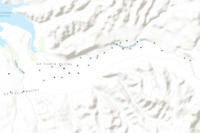

In [2]:
output = arcGIS_data_load('6c373b6756ba4789b2da8558bac4a256')

data = output['data0']
feature_service = output['feature_service']  

In [5]:
# Subset data for desired year.
data.rename(columns={"Date": "Observation_Date"}, inplace=True)
sYear = input("Start Year? (YYYY)")
sub = year_subset(data,sYear)

Start Year? (YYYY)2018
Analysis for 2018-10-01 07:00 UTC to 2019-10-01 07:00 UTC
Entries in Subset: 817


# QAQC

In [6]:
QAQC_whitespace(data)
    

Name of Object ID Column:  ['OBJECTID']


Analysis for: BehavioralCue
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: BreedingObs
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Comments
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Observer
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: PointType
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: PointTypeNumber
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Site
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: SpeciesCode
No \xa0 characters found
No double spa

In [9]:
#Find blank entries
find_blank_entries(data,exclude_cols=['BreedingObs','Comments'])

No blank PointTypeNumber
No blank OBJECTID
No blank x
No blank Distance
No blank Observation_Date
No blank BehavioralCue
No blank Observer
No blank CloudCover
No blank SpeciesCom
No blank PointType
No blank SHAPE
No blank SpeciesCode
No blank AirTemp
No blank Site
No blank Visit
No blank SpeciesSci
No blank y
No blank WindSpeed


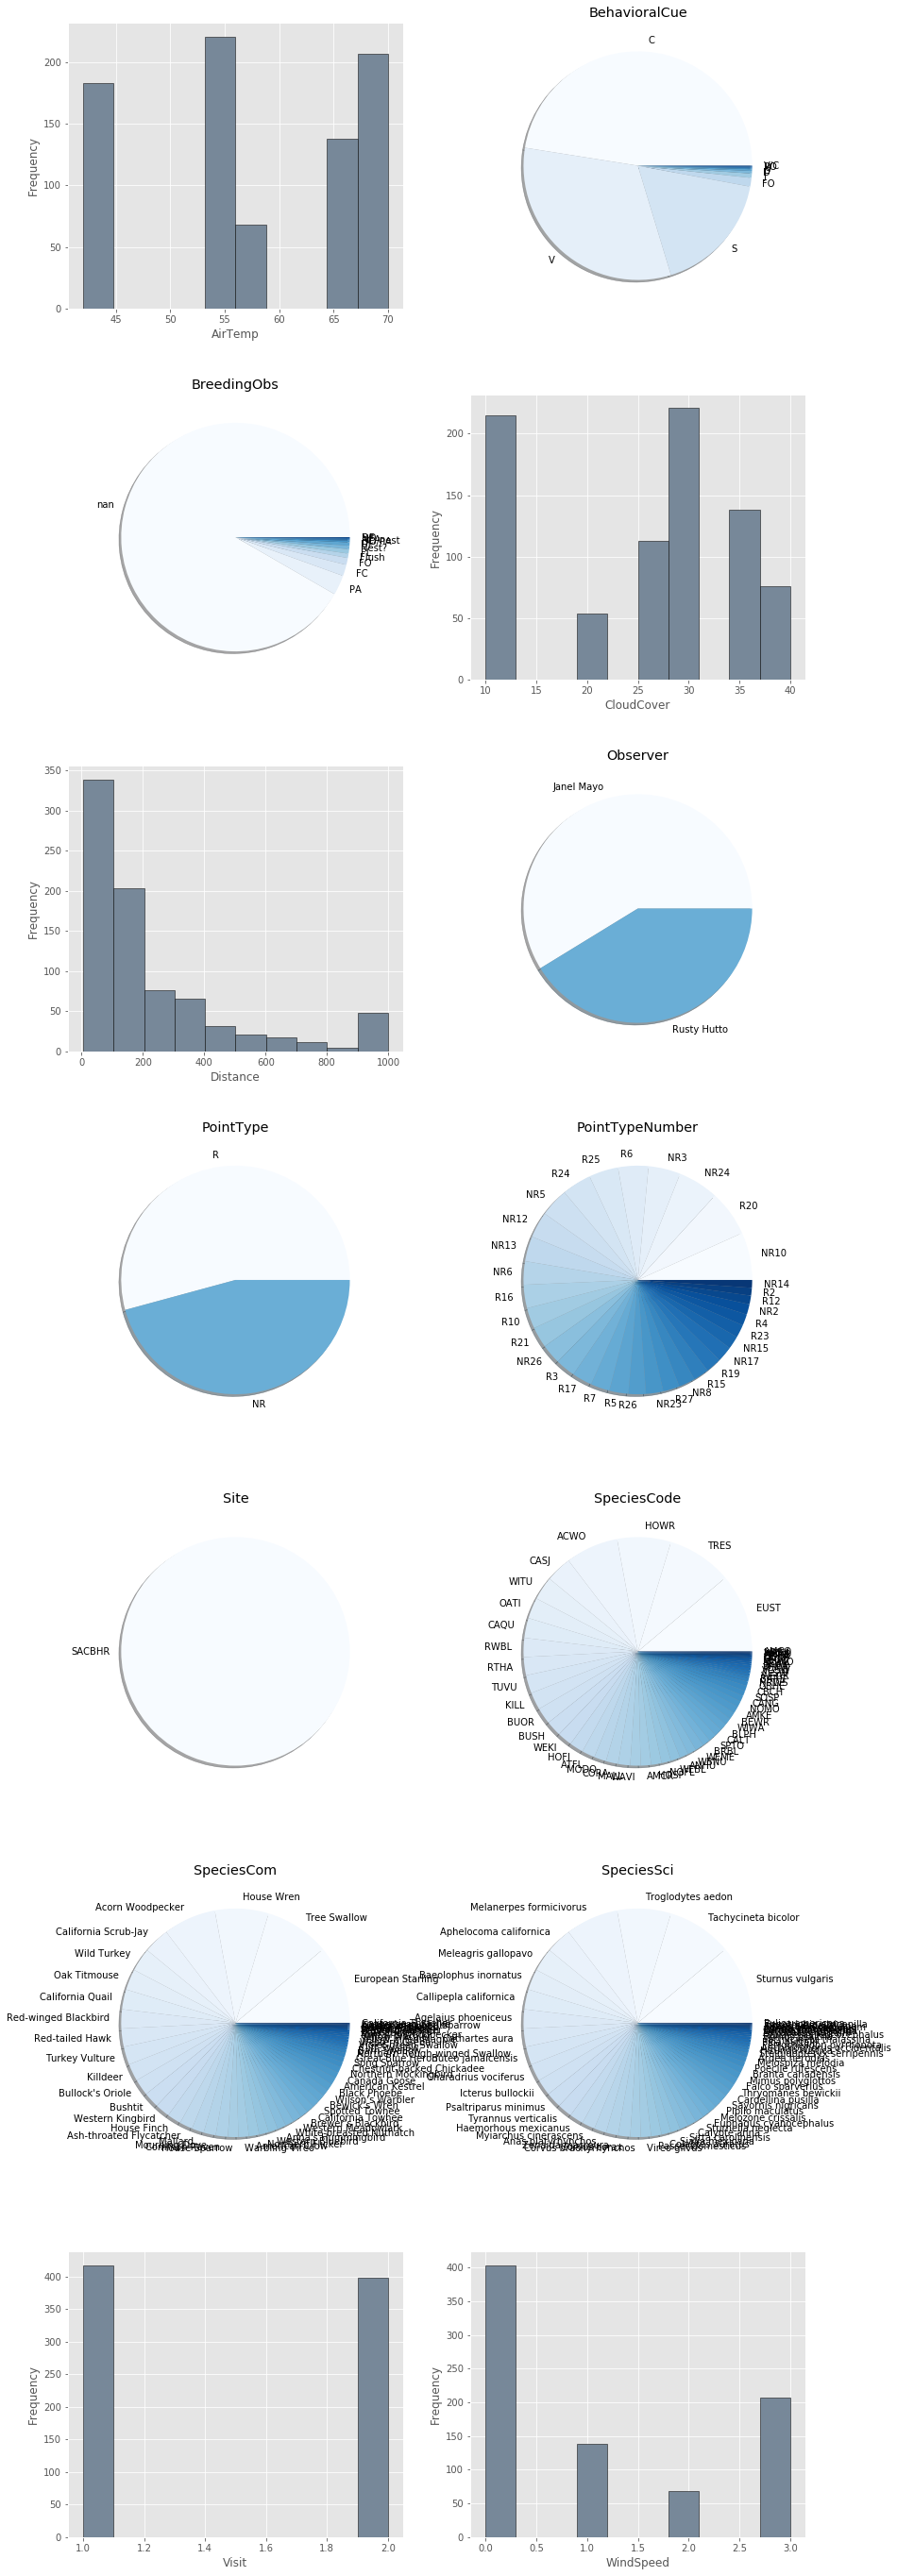

In [10]:
#plot data
QAQC_plot(data, ['AirTemp', 'BehavioralCue', 'BreedingObs', 'CloudCover', 
       'Distance', 'Observer', 'PointType',
       'PointTypeNumber', 'Site', 'SpeciesCode', 'SpeciesCom',
       'SpeciesSci', 'Visit', 'WindSpeed'])

In [11]:
#find outliers
 outlier = find_outlier(data,['Distance'])

Distance  Outlier: True
See Outlier Entries Below:


# Results

In [15]:
##### Keystone Species matches - USED
#Load in keystone species excel doc
keyDir = "Script Support Files\GWA_KeystoneSpecies.xlsx"
keySheet = "Sheet1"
keySpecies = pd.read_excel(keyDir, keySheet)

#Lists of keystone species for riparian and non-riparian
Gkey = keySpecies["Grassland"].dropna()
OWkey = keySpecies["Oak Woodland"].dropna()
Rkey = keySpecies["Riparian"]

#
print('Check for weird characters if updated keystone excel document:\n')
print(Gkey.tolist())
print('\n',OWkey.tolist())
print('\n',Rkey.tolist())
#Subset data to riparian and non-riparian species lists
obsBirds = sub.loc[:,"SpeciesSci"]

#Match keystone list against species list
Gmatches = Gkey.isin(obsBirds)
OWmatches = OWkey.isin(obsBirds)
Rmatches = Rkey.isin(obsBirds)

#Combine back into dataframe and format
G_keystone = pd.concat([Gkey, Gmatches], axis=1)
G_keystone.columns = ['Grassland Keystone Species','Present in GWA Survey?']
OW_keystone =  pd.concat([OWkey, OWmatches], axis=1)
OW_keystone.columns = ['Oak Woodland Keystone Species','Present in GWA Survey?']
R_keystone =  pd.concat([Rkey, Rmatches], axis=1)
R_keystone.columns = ['Riparian Keystone Species','Present in GWA Survey?']

print('\n\nResults of GWA surveys, DOES NOT INCLUDE INCIDENTAL OBSERVATIONS:')
display(G_keystone)
display(OW_keystone)
display(R_keystone)

Check for weird characters if updated keystone excel document:

['Ammodramus savannarum', 'Buteo regalis', 'Circus cyaneus', 'Passerculus sandwichensis', 'Sturnella neglecta']

 ['Melanerpes formicivorus', 'Polioptila caerulea', 'Aphelocoma californica', 'Chondestes grammacus', 'Baeolophus inornatus', 'Sialia mexicana', 'Pica nuttalli']

 ['Pheucticus melanocephalus', 'Geothlypis trichas', 'Melospiza melodia', 'Catharus ustulatus', 'Tachycineta bicolor', 'Agelaius tricolor', 'Vireo gilvus', 'Cardellina pusilla', 'Setophaga petechia']


Results of GWA surveys, DOES NOT INCLUDE INCIDENTAL OBSERVATIONS:


,Grassland Keystone Species,Present in GWA Survey?
0,Ammodramus savannarum,False
1,Buteo regalis,False
2,Circus cyaneus,False
3,Passerculus sandwichensis,False
4,Sturnella neglecta,True


,Oak Woodland Keystone Species,Present in GWA Survey?
0,Melanerpes formicivorus,True
1,Polioptila caerulea,False
2,Aphelocoma californica,True
3,Chondestes grammacus,False
4,Baeolophus inornatus,True
5,Sialia mexicana,True
6,Pica nuttalli,True


,Riparian Keystone Species,Present in GWA Survey?
0,Pheucticus melanocephalus,False
1,Geothlypis trichas,False
2,Melospiza melodia,True
3,Catharus ustulatus,False
4,Tachycineta bicolor,True
5,Agelaius tricolor,False
6,Vireo gilvus,True
7,Cardellina pusilla,True
8,Setophaga petechia,True


In [16]:
# SITE WIDE richness - count of species
print("Richness:\n",sub.SpeciesSci.nunique())

Richness:
 58


In [20]:
# Abundance and Relative abundance site wide
abundance = sub.groupby(['SpeciesSci']).Observation_Date.count() #Abundance grouped by station and speices
observations = sub.Observation_Date.count() # Count of observations across site

rAbun = pd.DataFrame(abundance / observations) #Relative abundence grouped by station
rAbun = rAbun.rename(index=str, columns={"Observation_Date": "RelAbundence"})

print("Abundance:\n\n",abundance,"\n\n")

print("Relative Abundance:\n", rAbun)
abundance

Abundance:

 SpeciesSci
Aechmophorus occidentalis      3
Agelaius phoeniceus           22
Anas platyrhynchos            14
Aphelocoma californica        30
Aquila chrysaetos              1
Ardea herodias                 5
Baeolophus inornatus          24
Branta canadensis              7
Buteo jamaicensis             21
Callipepla californica        23
Calypte anna                  10
Cardellina pusilla             8
Cathartes aura                21
Charadrius vociferus          20
Colaptes auratus              11
Corvus brachyrhynchos         12
Corvus corax                  14
Dryobates nuttallii            2
Euphagus cyanocephalus         9
Falco sparverius               8
Fulica americana               1
Haemorhous mexicanus          16
Haliaeetus leucocephalus       2
Hirundo rustica                3
Icterus bullockii             19
Junco hyemalis                 1
Lanius ludovicianus            1
Melanerpes formicivorus       61
Meleagris gallopavo           27
Melospiza melodia  

SpeciesSci
Aechmophorus occidentalis      3
Agelaius phoeniceus           22
Anas platyrhynchos            14
Aphelocoma californica        30
Aquila chrysaetos              1
Ardea herodias                 5
Baeolophus inornatus          24
Branta canadensis              7
Buteo jamaicensis             21
Callipepla californica        23
Calypte anna                  10
Cardellina pusilla             8
Cathartes aura                21
Charadrius vociferus          20
Colaptes auratus              11
Corvus brachyrhynchos         12
Corvus corax                  14
Dryobates nuttallii            2
Euphagus cyanocephalus         9
Falco sparverius               8
Fulica americana               1
Haemorhous mexicanus          16
Haliaeetus leucocephalus       2
Hirundo rustica                3
Icterus bullockii             19
Junco hyemalis                 1
Lanius ludovicianus            1
Melanerpes formicivorus       61
Meleagris gallopavo           27
Melospiza melodia              6

Text(0, 0.5, 'Abundance')

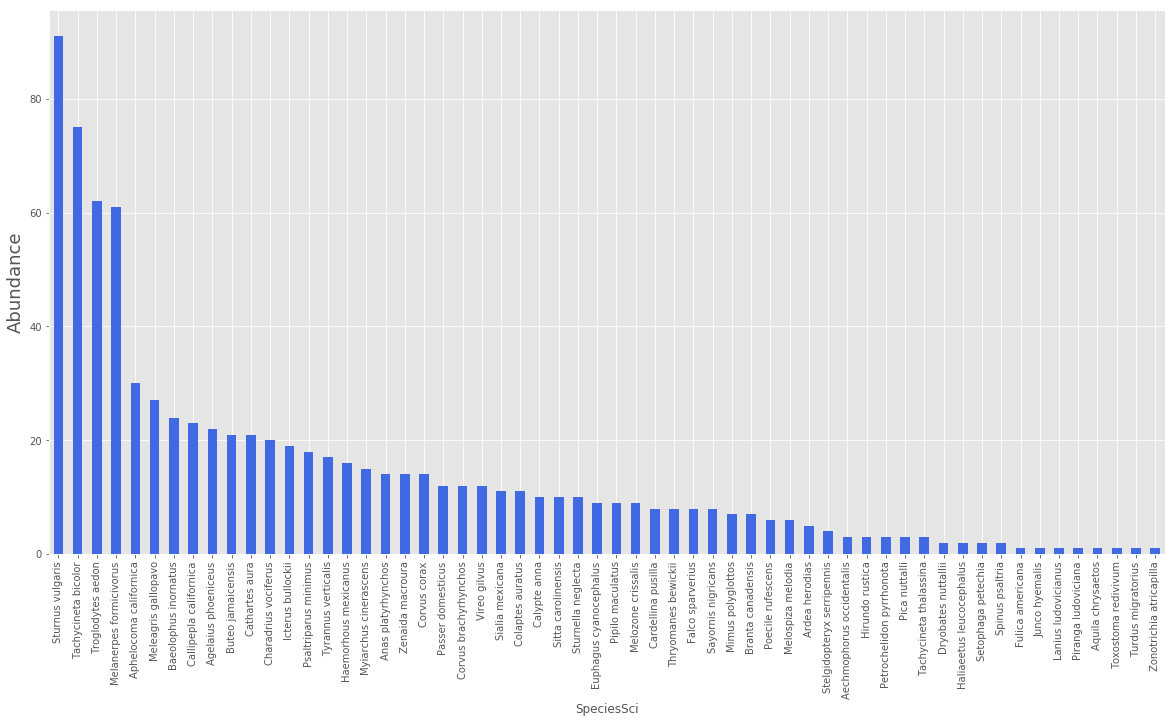

In [21]:
#Abundance plot for entire site
h = abundance.sort_values(ascending=False).plot.bar(figsize=(20, 10), color='royalblue')
plt.ylabel('Abundance', fontsize=18)


Text(0, 0.5, 'Relative Abundance (%)')

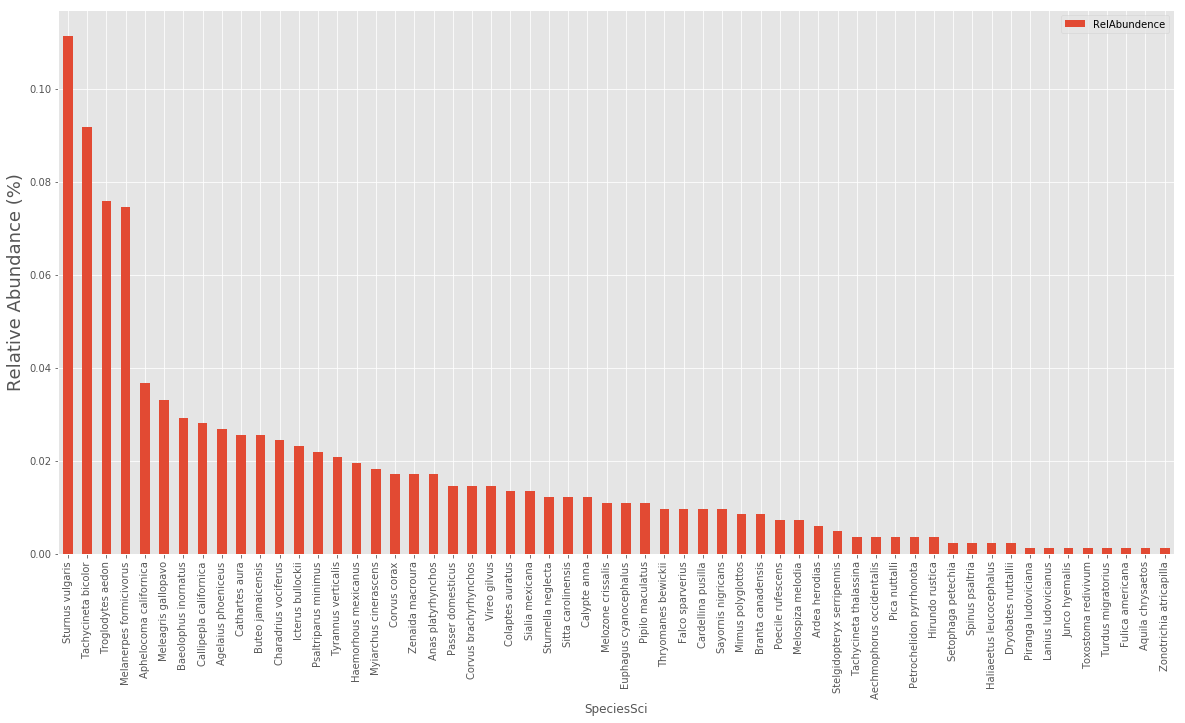

In [22]:
# Plot relative abundance for entire site

rAbun.sort_values(by=['RelAbundence'],ascending=False).plot.bar(figsize=(20, 10))
plt.ylabel('Relative Abundance (%)', fontsize=18)

In [25]:
# Shannon index for entire site 
elmt = rAbun * numpy.log(rAbun)
shannon_site = elmt.sum()*-1

print("Shannon Index for entire site:\n",shannon_site.values)

Shannon Index for entire site:
 [3.51148969]


In [26]:
# Simpson entire site
elmt = rAbun**2
simpson_site = 1/elmt.sum()

print("Simpson Index for entire site:\n",simpson_site.values)

Simpson Index for entire site:
 [22.42379145]


# Export Data Deliverable

In [27]:
data.columns

Index(['AirTemp', 'BehavioralCue', 'BreedingObs', 'CloudCover', 'Comments',
       'Observation_Date', 'Distance', 'OBJECTID', 'Observer', 'PointType',
       'PointTypeNumber', 'SHAPE', 'Site', 'SpeciesCode', 'SpeciesCom',
       'SpeciesSci', 'Visit', 'WindSpeed', 'x', 'y'],
      dtype='object')

In [28]:
field_order = [
'Site',
'Observation_Date',
'Observer',
'PointType',
'PointTypeNumber',
'SpeciesSci',
'SpeciesCom',
'SpeciesCode',
'CloudCover',
'AirTemp',
'WindSpeed',
'BreedingObs',
'BehavioralCue',   
'Distance',       
'Visit',
'Comments',
'x', 
'y',
'OBJECTID',
'SHAPE'
]
    

In [29]:
export_data_deliverable(data, feature_service, field_order )

No Related Table Found
Exported to G:/Scripts_Toolboxes/Annual_Report/Outputs/SAC_General_Wildlife_Assessment_Data_20191206.xlsx
